In [1]:
import sys
sys.path.append('../src')
from conversation import run_single_conversation
from figure import draw_lineplot
import multiprocessing as mp
import pickle

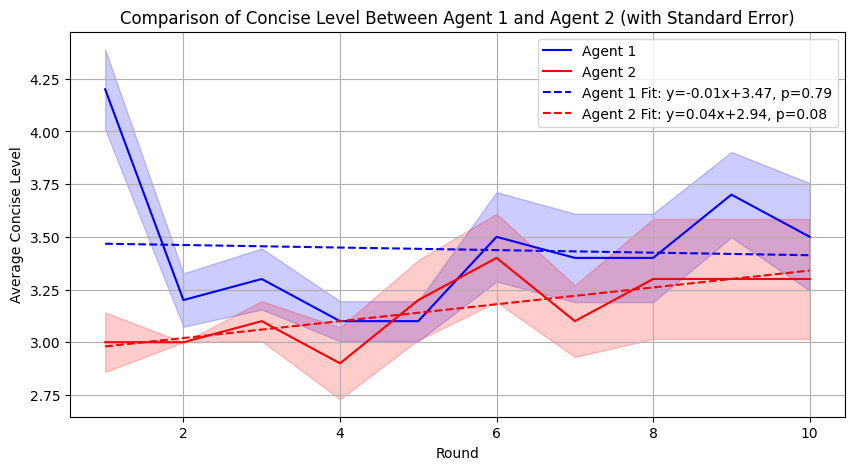

In [ ]:
key = "concise"
repeat = 10

if __name__ == "__main__":
    num_processes = min(mp.cpu_count(), 10)  # Use up to 10 CPU cores
    arg_list = [key for i in range(repeat)]
    with mp.Pool(processes=num_processes) as pool:
        results = pool.map(run_single_conversation, arg_list)  # Run 10 conversations in parallel

    # Unpacking results
    agent1_ratings, agent2_ratings, conversations = zip(*results)

    # Save results
    result_dir = "../results/"
    with open(f'{result_dir}r1_{key}_simple.pkl', 'wb') as f:
        pickle.dump(list(agent1_ratings), f)

    with open(f'{result_dir}r2_{key}_simple.pkl', 'wb') as f:
        pickle.dump(list(agent2_ratings), f)

    with open(f'{result_dir}c_{key}_simple.pkl', 'wb') as f:
        pickle.dump(list(conversations), f)

    draw_lineplot(agent1_ratings, agent2_ratings, key, result_dir)